## Background & Context
This dataset contains listings of used cars and their associated attributes, including
price, brand, model year, condition, mileage, fuel type, and location. It is typically
used for market analysis, price prediction, and demand-supply insights in the used
automobile sector. The data reflects real-world car listings and can support
applications in business analytics, machine learning models for price estimation, and
consumer behavior studies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Tasks
1. Data Ingestion & Quality Profiling
1. Load & Inspect
   
● Read car_prices.csv into a pandas DataFrame.

In [2]:
df= pd.read_csv("C:/Users/agarw/Downloads/Dataset-Pyhton-001/Dataset/car_prices.csv")

● Display the first 5 rows.

In [3]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


● Display data types and record count

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
1.2. Understanding the Data Structure
● Check the shape of the dataset (rows and columns).

In [5]:
print("Number of Rows:",df.shape[0],
     "Number of Columns:", df.shape[1])

Number of Rows: 558837 Number of Columns: 16


● Display column names and data types.

In [6]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [7]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

1.3 Missing & Anomaly Detection

● Quantify nulls per column; visualize with a bar chart or heatmap.

In [8]:
print("Null Vales per column:")
print(df.isnull().sum())

Null Vales per column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


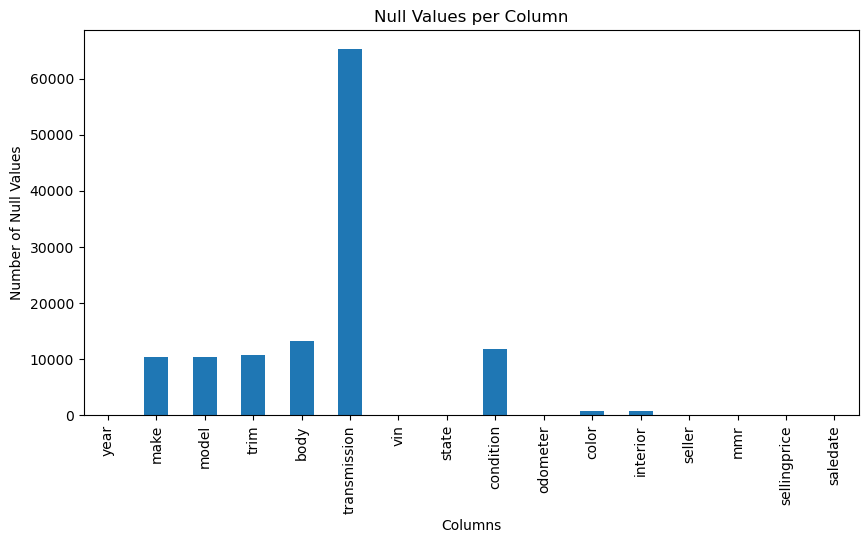

In [9]:
df.isnull().sum().plot(kind='bar', figsize=(10, 5), title='Null Values per Column')
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")
plt.show()

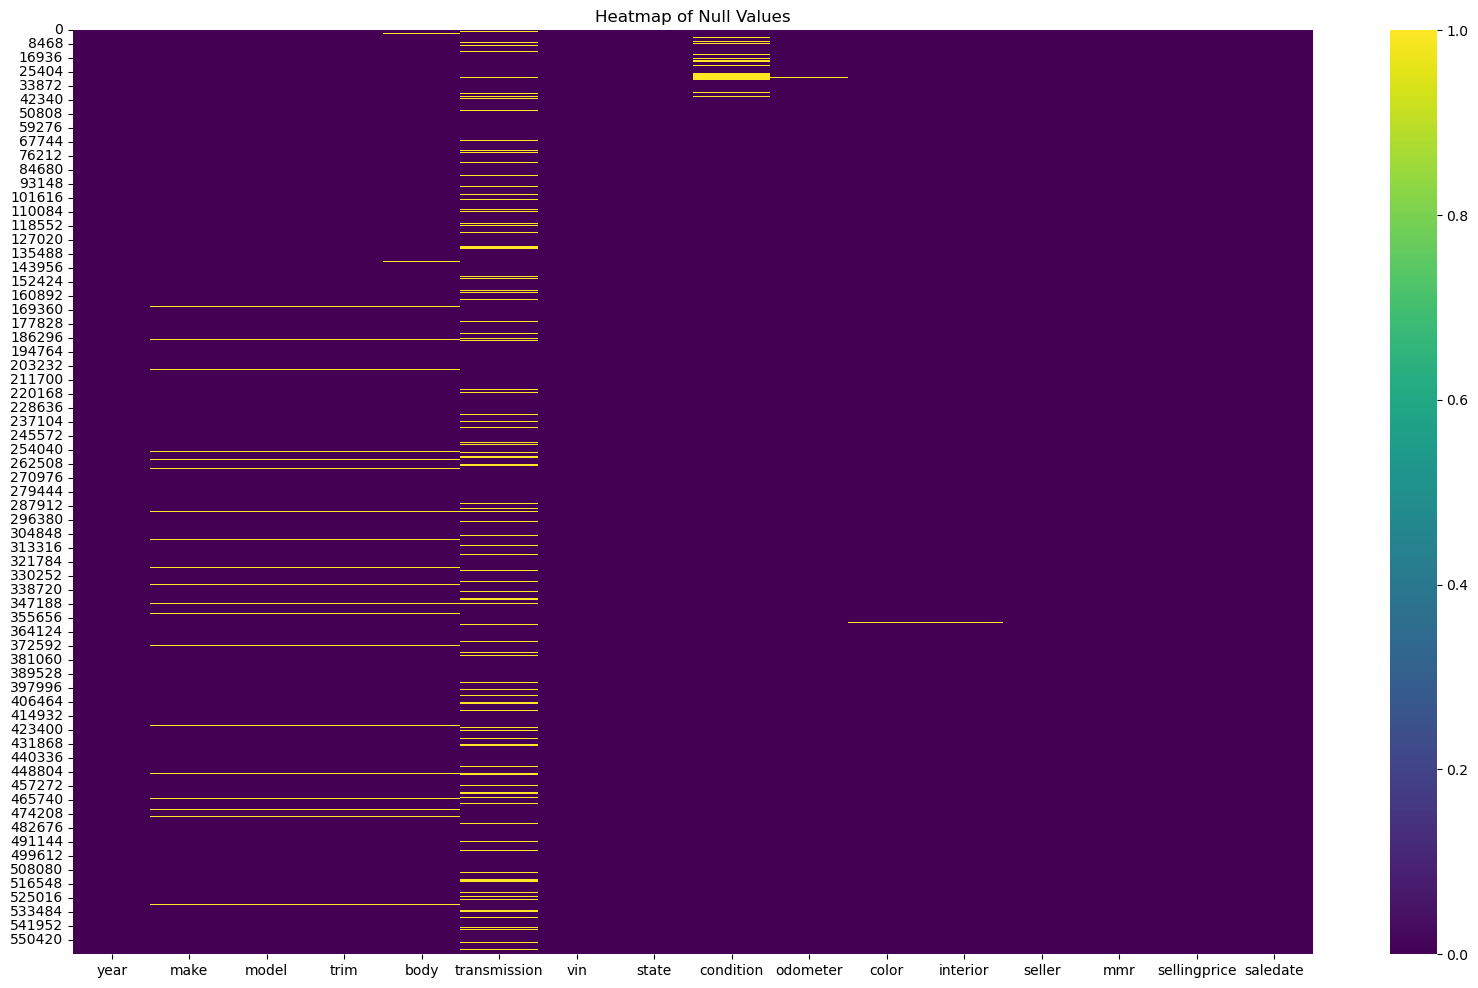

In [10]:
null_matrix = df.isnull().astype(int)
null_summary = df.isnull().sum().to_frame(name='Null_Count')
null_summary['Null_Percentage'] = (df.isnull().sum() / len(df)) * 100
plt.figure(figsize=(20,12))
sns.heatmap(null_matrix, cmap='viridis', cbar=True)
plt.title("Heatmap of Null Values")
plt.show()

In [11]:
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "percent_null": (df.isnull().sum() / len(df)) * 100
})
print(summary)

                dtype  percent_null
year            int64      0.000000
make           object      1.843292
model          object      1.860829
trim           object      1.905922
body           object      2.361154
transmission   object     11.694287
vin            object      0.000716
state          object      0.000000
condition     float64      2.115107
odometer      float64      0.016821
color          object      0.134028
interior       object      0.134028
seller         object      0.000000
mmr           float64      0.006800
sellingprice  float64      0.002147
saledate       object      0.002147


● Resolve null values by appropriate strategy based on the datatype and
percentage of null values.

In [12]:
Category_Column = ['make','model','trim','body','transmission','color','interior']
for col in Category_Column:
    df[col] = df[col].fillna(df[col].mode()[0])
Float_Column = ['condition','odometer','mmr','sellingprice']
for col in Float_Column: 
    df[col] = df[col].fillna(df[col].median())

In [13]:
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "percent_null": (df.isnull().sum() / len(df)) * 100
})

print(summary)

                dtype  percent_null
year            int64      0.000000
make           object      0.000000
model          object      0.000000
trim           object      0.000000
body           object      0.000000
transmission   object      0.000000
vin            object      0.000716
state          object      0.000000
condition     float64      0.000000
odometer      float64      0.000000
color          object      0.000000
interior       object      0.000000
seller         object      0.000000
mmr           float64      0.000000
sellingprice  float64      0.000000
saledate       object      0.002147


● Count number of duplicate records and delete if any present

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
558832    False
558833    False
558834    False
558835    False
558836    False
Length: 558837, dtype: bool

2. Data frames Queries:
   
2.1 Calculate the average, minimum, and maximum car price?

In [15]:
Max_SellingPrice = df['sellingprice'].max()
Min_SellingPrice = df['sellingprice'].min()
Average_SellingPrice =  df['sellingprice'].mean()
print("Maximum Car Price:", Max_SellingPrice)
print("Minimum Car Price:", Min_SellingPrice )
print("Average Car Price:", Average_SellingPrice)

Maximum Car Price: 230000.0
Minimum Car Price: 1.0
Average Car Price: 13611.326356343621


2.2 List all unique colors of cars?


In [16]:
Unique_Colors = df['color'].unique()
print("Unique Colors of Car:", Unique_Colors)

Unique Colors of Car: ['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872' '12655'
 '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887' '9837'
 '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562' '5001']


2.3 Find the number of unique car brands and car models?


In [17]:
Unique_CarBrands = df['make'].nunique()
print("Unique Car Brands:", Unique_CarBrands)

Unique Car Brands: 96


In [18]:
Unique_CarModel = df['model'].nunique()
print("Unique Car Model :", Unique_CarModel)

Unique Car Model : 973


2.4 Find all car information having selling prices greater than $165000?

In [19]:
filtered_data = df[df['sellingprice'] > 165000]
filtered_data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,wddug7kb2fa102347,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s59cux50803,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,sca664s52dux52152,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,zff67nfa1b0178698,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


2.5 Find the top 5 most frequently sold car models?

In [20]:
top_5_models = df['model'].value_counts().head(5)
print("Top 5 Most Frequently Sold Car Models:")
print(top_5_models)


Top 5 Most Frequently Sold Car Models:
model
Altima    29748
F-150     14479
Fusion    12946
Camry     12545
Escape    11861
Name: count, dtype: int64


2.6 What is the average selling price of cars by brand (make)?

In [21]:
avg_price_by_make = df.groupby('make')['sellingprice'].mean()
print(avg_price_by_make)


make
Acura           14017.268260
Aston Martin    54812.000000
Audi            19915.432782
BMW             21441.895748
Bentley         74367.672414
                    ...     
subaru           3710.416667
suzuki           4810.000000
toyota           7339.105263
volkswagen       6145.833333
vw              13672.916667
Name: sellingprice, Length: 96, dtype: float64


2.7 What is the minimum selling price of cars for each interior?

In [22]:
min_price_by_interior = df.groupby('interior')['sellingprice'].min()
print(min_price_by_interior)


interior
beige         100.0
black           1.0
blue          150.0
brown         200.0
burgundy      175.0
gold          250.0
gray            1.0
green         100.0
off-white     900.0
orange       1200.0
purple        200.0
red           200.0
silver        150.0
tan           100.0
white         350.0
yellow       3100.0
—             150.0
Name: sellingprice, dtype: float64


2.8 Find highest odometer reading per year from highest to lowest order?

In [23]:
highest_odometer_per_year = (
    df.groupby('year')['odometer']
      .max()
      .sort_values(ascending=False)
)

print(highest_odometer_per_year)


year
1999    999999.0
2013    999999.0
2011    999999.0
2010    999999.0
2009    999999.0
2008    999999.0
2007    999999.0
2006    999999.0
2005    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2014    999999.0
1998    999999.0
1997    999999.0
1996    999999.0
1993    999999.0
2012    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64


2.9 Create a new column for car age (assuming the current year is 2025)

In [24]:
df['car_age'] = 2025 - df['year']
df[['year', 'car_age']].head()


,year,car_age
0,2015,10
1,2015,10
2,2014,11
3,2015,10
4,2014,11


2.10 Find the number of cars having a condition greater than or equal to 48
and odometer greater than 90000?

In [42]:
result = df[(df['condition'] >= 48) & (df['odometer'] > 90000)]
count = result.shape[0]
count

746

2.11 Which state consistently has higher car prices for newer
cars(year>2013)?

In [43]:
newer_cars = df[df['year'] > 2013]
state_price = newer_cars.groupby('state')['sellingprice'].mean().sort_values(ascending=False)
state_price

state
oh                   28020.221053
ab                   25204.255319
nj                   24237.063973
on                   22962.560386
qc                   22722.938144
                         ...     
3vwd17aj5fm225953    13200.000000
3vwd17aj8fm239622    13200.000000
3vwd17aj4fm201708    13200.000000
3vwd17aj3fm276741    13200.000000
ok                   10600.000000
Name: sellingprice, Length: 64, dtype: float64

2.12 For cars with excellent condition (top 20%), which makes have the
lowest average price (value for money)?

In [44]:
# Step 1: Find top 20% threshold for condition
threshold = df['condition'].quantile(0.80)

# Step 2: Filter excellent condition cars
excellent_cars = df[df['condition'] >= threshold]

# Step 3: Find average price by make
value_for_money = (
    excellent_cars.groupby('make')['sellingprice']
    .mean()
    .sort_values(ascending=True)
)

value_for_money.head(10)  # showing top 10 value-for-money makes

make
Isuzu         1125.000000
Oldsmobile    1910.000000
honda         4233.333333
Saturn        5700.406504
subaru        6200.000000
chrysler      6225.000000
smart         6835.759494
mazda         7275.000000
Pontiac       7686.824324
Saab          7711.111111
Name: sellingprice, dtype: float64

## 3. Data Visualization and insights:
3.1 Show the correlation of all the features(columns) having numerical
values(e.g. selling price, odometer).


In [28]:
# Step 1: Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Compute correlation
correlation_matrix = numeric_df.corr()

# Step 3: Display result
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  year  condition  odometer       mmr  sellingprice   car_age
year          1.000000   0.323564 -0.772415  0.596594      0.586474 -1.000000
condition     0.323564   1.000000 -0.304580  0.273153      0.313120 -0.323564
odometer     -0.772415  -0.304580  1.000000 -0.587958     -0.582267  0.772415
mmr           0.596594   0.273153 -0.587958  1.000000      0.983634 -0.596594
sellingprice  0.586474   0.313120 -0.582267  0.983634      1.000000 -0.586474
car_age      -1.000000  -0.323564  0.772415 -0.596594     -0.586474  1.000000


## SUMMARY

1. Strong Relationships

MMR and Selling Price (0.98)
This is the strongest positive correlation. It indicates that as the MMR (Manheim Market Report price) increases, the selling price also increases almost proportionally. This makes sense because MMR reflects market value.

Car Age and Year (-1.00)
These two are perfectly negatively correlated because car_age = current_year – year. As the manufacturing year increases (newer car), the age decreases.

2. Moderate Positive Correlations

Year and Selling Price (0.59)
Newer cars tend to have higher selling prices.

Year and MMR (0.59)
MMR also increases for newer cars.

Condition and Year (0.32)
Newer cars generally have slightly better condition.

Condition and Selling Price (0.31)
Better condition tends to increase selling price.

3. Moderate Negative Correlations

Odometer and Year (-0.77)
Newer cars have lower mileage.

Odometer and Selling Price (-0.58)
Higher mileage leads to lower selling prices.

Odometer and MMR (-0.59)
Higher mileage reduces market valuation.

4. Condition and Car Age (-0.32)

As cars become older, their condition slightly worsens, which is reasonable.

Key Insights

Price is mainly driven by MMR, Year, Condition, and Odometer.

Older cars with higher mileage sell for less.

MMR is an excellent predictor of selling price.

Year and Car Age essentially tell the same story but in opposite directions.

3.2 Plot a graph to show the average selling price by year and explain the
pattern you notice from the graph. Which plot will you use bar or scatter?


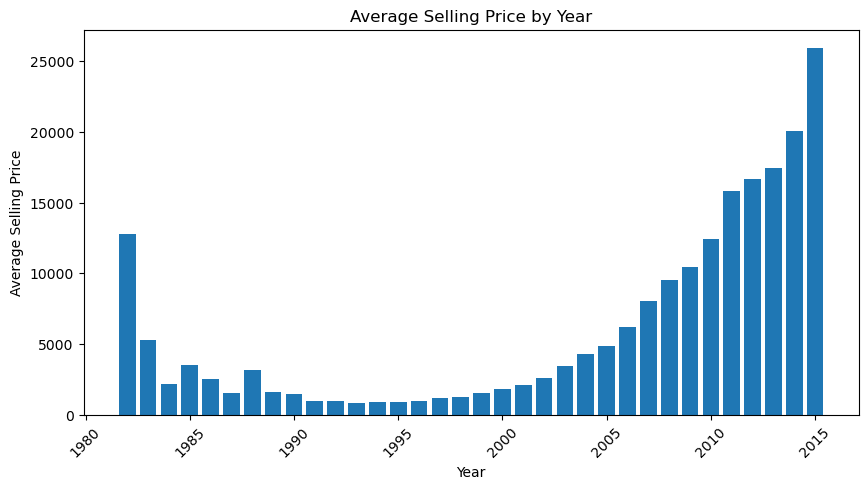

In [29]:
# Step 1: Compute average selling price by year
avg_price_by_year = df.groupby('year')['sellingprice'].mean()

# Step 2: Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(avg_price_by_year.index, avg_price_by_year.values)
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Year")
plt.xticks(rotation=45)
plt.show()

## Summary

The graph shows a clear upward trend in the average selling price of cars over the years. Older cars (especially those manufactured before the mid-1990s) have significantly lower average selling prices, which aligns with normal vehicle depreciation patterns.

## Key Findings

A few early years (like 1980–1982) show unusually high average prices—this may be due to very few samples or special/rare vehicles in those years, causing spikes.

From around 2000 onward, the trend becomes steady and consistent:

Average selling price gradually increases between 2000 and 2005.

After 2005, prices start rising more sharply.

From 2010 to 2015, the selling prices grow rapidly, reaching the highest values in 2015.

This indicates that newer vehicles hold much higher market value, and the dataset strongly reflects the depreciation curve:
newer cars → higher selling prices,
older cars → lower selling prices.

# BAR CHART

We will use the bar chart to know the trend of the average as well it is easy to compare and shows the great insights than scatter plot. Generally bar chart is used to for categorical data as well but here to show the trend of the average we have use the Bar Chart.

3.3 Plot a graph to show average selling price by odometer and explain the
trend you notice from the graph.


C:\Users\agarw\AppData\Local\Temp\ipykernel_28984\637983187.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_odometer = df.groupby('odometer_bin')['sellingprice'].mean()


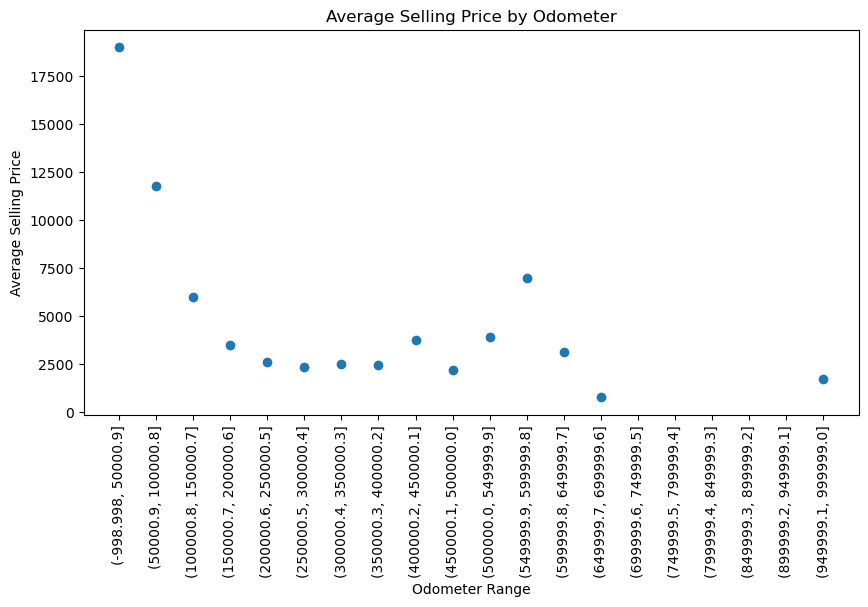

In [30]:
# Optionally: smooth the data by grouping odometer ranges (recommended)
df['odometer_bin'] = pd.cut(df['odometer'], bins=20)  # 20 bins for smoothing
avg_price_by_odometer = df.groupby('odometer_bin')['sellingprice'].mean()
# Plot scatter of average values
plt.figure(figsize=(10,5))
plt.scatter(avg_price_by_odometer.index.astype(str), avg_price_by_odometer.values)
plt.xlabel("Odometer Range")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Odometer")
plt.xticks(rotation=90)
plt.show()

## Summary

The plot shows a strong inverse relationship between a car’s odometer reading and its average selling price. Cars with low mileage (0–50,000 miles) have the highest average selling prices, indicating that buyers highly value less-used vehicles.

As the odometer reading increases, the selling price declines sharply, especially up to around 200,000 miles. Beyond this range, the decrease in selling price slows down and becomes more stable, with most high-mileage cars (200,000–700,000 miles) having relatively low and similar prices.

A few mid-to-higher odometer ranges show slight spikes, which may be due to:

specific vehicle models holding value better

fewer data points in those bins

anomalies such as restored vehicles or commercial vehicles

## Key Takeaway:

Overall, the chart clearly shows that higher mileage leads to lower resale value, reinforcing the expected depreciation pattern where odometer is a strong negative predictor of selling price.

3.4 Plot a graph to show the number of cars sold in each state. Find the top
three highest car selling states by having a look at the graph?


state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64


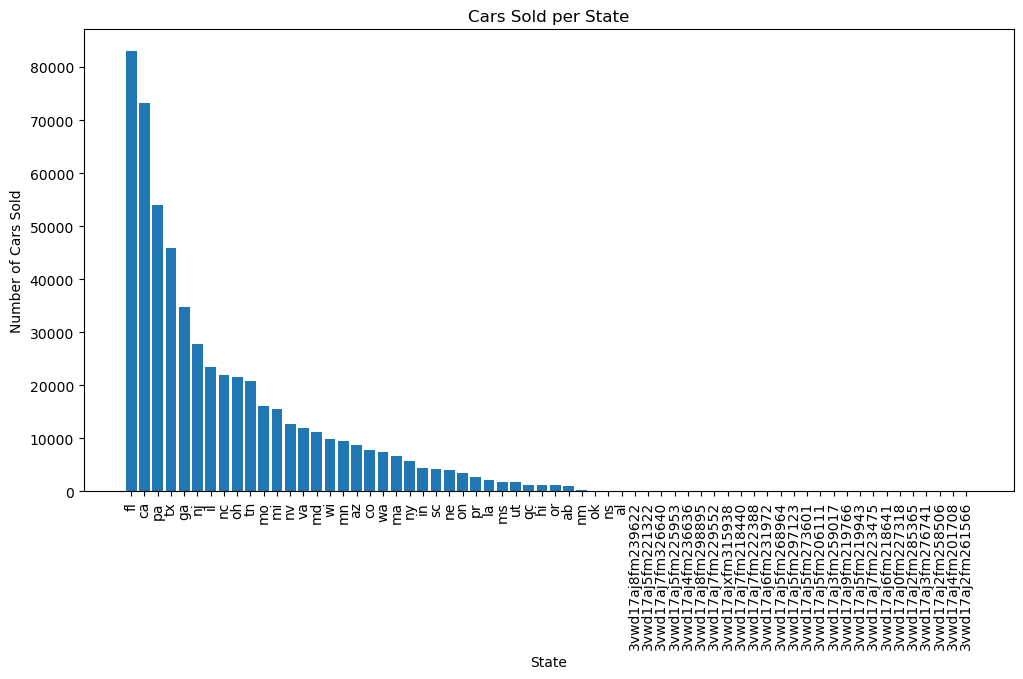

Top 3 highest selling states:
state
fl    82945
ca    73148
pa    53907
Name: count, dtype: int64


In [31]:
cars_per_state = df['state'].value_counts()
print(cars_per_state)


plt.figure(figsize=(12,6))
plt.bar(cars_per_state.index, cars_per_state.values)
plt.xlabel("State")
plt.ylabel("Number of Cars Sold")
plt.title("Cars Sold per State")
plt.xticks(rotation=90)
plt.show()

top_3_states = cars_per_state.head(3)
print("Top 3 highest selling states:")
print(top_3_states)


## SUMMARY:

The bar chart shows the distribution of total car sales across different states. The data clearly reveals that car sales are highly concentrated in a few states, with sales gradually decreasing as we move toward the right side of the chart.

Florida (FL) has the highest number of car sales, exceeding 80,000, making it the largest market in the dataset.

California (CA) and Pennsylvania (PA) also show very high sales, indicating strong used-car market activity.

States such as Texas (TX), Georgia (GA), Illinois (IL), and North Carolina (NC) follow, contributing significantly to total sales.

As the chart moves toward states with smaller bars, the number of cars sold decreases steadily.

The states on the far right have very low sales, suggesting smaller markets or less dataset representation.

## Key Takeaway

Overall, the chart highlights a skewed distribution, where a small number of states dominate car sales, while many others contribute only a small fraction. This may reflect population size, market demand, or data collection patterns.

3.5 Plot a bar graph of average selling price by condition score ranges of size
Give a summary of the insights.


C:\Users\agarw\AppData\Local\Temp\ipykernel_28984\1356679126.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_condition = df.groupby('condition_bin')['sellingprice'].mean()


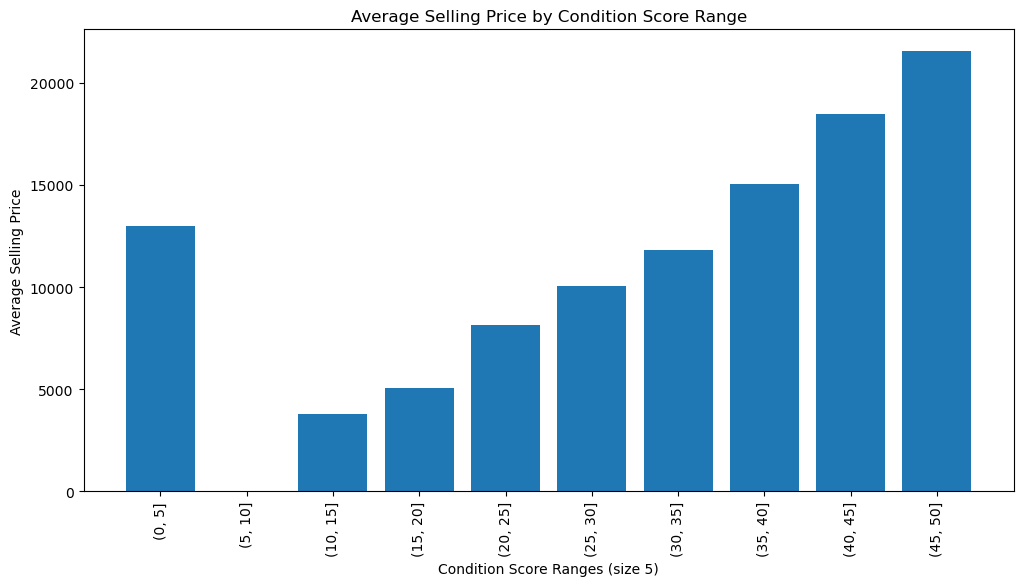

In [32]:
# Step 1: Create bins of size 5
df['condition_bin'] = pd.cut(df['condition'], bins=range(0, int(df['condition'].max()) + 6, 5))

# Step 2: Calculate average selling price for each condition range
avg_price_by_condition = df.groupby('condition_bin')['sellingprice'].mean()

# Step 3: Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(avg_price_by_condition.index.astype(str), avg_price_by_condition.values)
plt.xlabel("Condition Score Ranges (size 5)")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Condition Score Range")
plt.xticks(rotation=90)
plt.show()


## Summary of the Chart: Average Selling Price by Condition Score Range

The chart shows how the average selling price changes across different condition score ranges (grouped in bins of 5).

Overall, there is a strong positive relationship between condition score and selling price:
As the condition score increases, the average selling price rises steadily.

Lower condition ranges (0–20) have noticeably lower selling prices, mostly between $3,500 and $5,000, with an unusually high value in the 0–5 bin (~$13,000), which may be an outlier.

From condition scores 20–50, the trend becomes smooth and clearly upward:

Around $8,200 for the 20–25 range

About $10,100 for 25–30

Approximately $12,000 for 30–35

Around $15,100 for 35–40

Roughly $18,400 for 40–45

And the highest bin 45–50 peaks at around $21,700

## Key Takeaway:
Better condition scores consistently lead to higher selling prices, with the highest condition range selling for more than five times the lowest typical ranges. The only irregularity is the unusually high average in the 0–5 score range, which may warrant further investigation.

3.6 Plot a bar graph of no. of cars sold by condition ranges of size 10. Give
some insights from the graph.

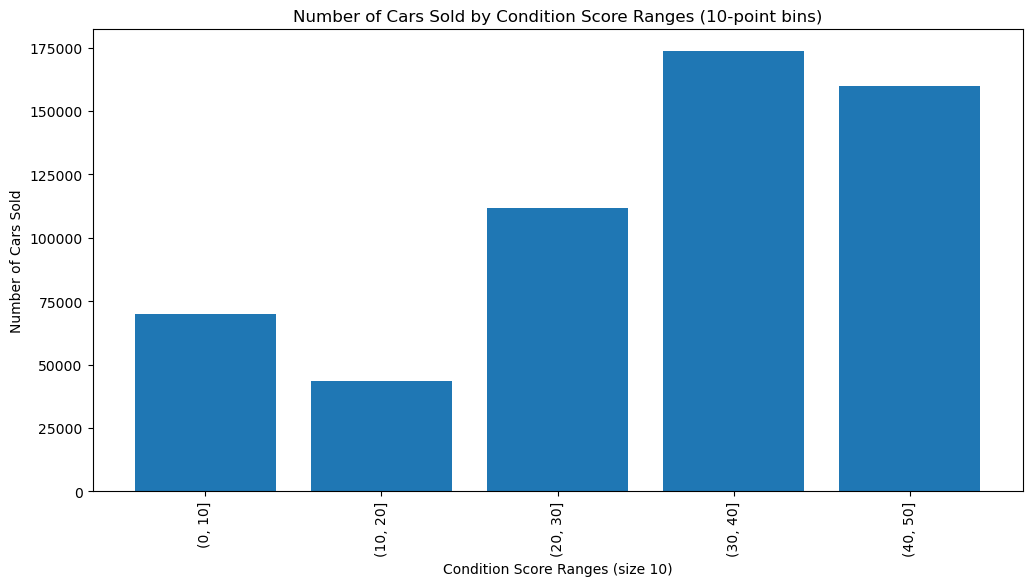

In [33]:
# Step 1: Create bins of size 10
df['condition_bin_10'] = pd.cut(df['condition'], bins=range(0, int(df['condition'].max()) + 11, 10))

# Step 2: Count number of cars in each condition range
count_by_condition = df['condition_bin_10'].value_counts().sort_index()

# Step 3: Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(count_by_condition.index.astype(str), count_by_condition.values)
plt.xlabel("Condition Score Ranges (size 10)")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Condition Score Ranges (10-point bins)")
plt.xticks(rotation=90)
plt.show()


## Summary of: Number of Cars Sold by Condition Score Ranges (10-point bins)

The chart shows how many cars were sold within each 10-point condition score range.

Overall, the number of cars sold increases as condition scores increase, indicating stronger market activity for higher-condition vehicles.

## Detailed observations:

0–10 range: ~70,000 cars sold — moderate volume.

10–20 range: drops to ~44,000 — the lowest volume among all bins.

20–30 range: jumps significantly to ~112,000 — demand increases sharply starting here.

30–40 range: peaks at ~174,000 cars — the highest sales volume across all ranges.

40–50 range: slightly lower at ~160,000 — still extremely high.

## Key Insight:

Cars with better condition scores (20–50) sell much more frequently than those in poorer condition.

The strongest demand is concentrated between 30 and 50, suggesting that buyers overwhelmingly prefer cars in good to excellent condition.

3.7 Plot a box plot to show the distribution of car selling prices grouped by
color. Extract insights and if required, remove outliers and plot the graph
again.

<Figure size 1400x600 with 0 Axes>

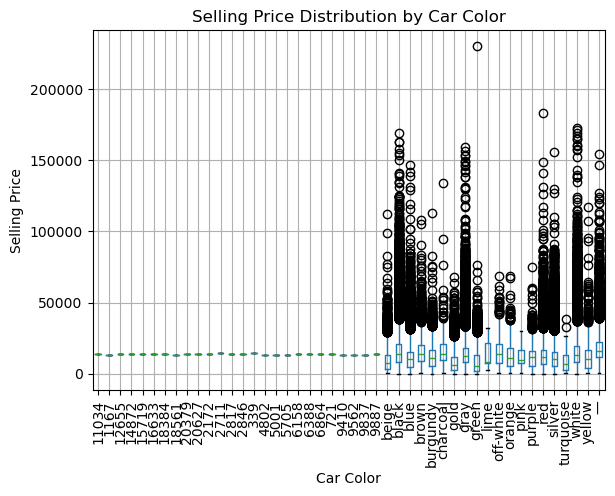

In [34]:
plt.figure(figsize=(14,6))
df.boxplot(column='sellingprice', by='color', rot=90)
plt.title("Selling Price Distribution by Car Color")
plt.suptitle("")          # Removes default subtitle
plt.xlabel("Car Color")
plt.ylabel("Selling Price")
plt.show()


C:\Users\agarw\AppData\Local\Temp\ipykernel_28984\1436541420.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(groupby_col, group_keys=False).apply(filter_group)


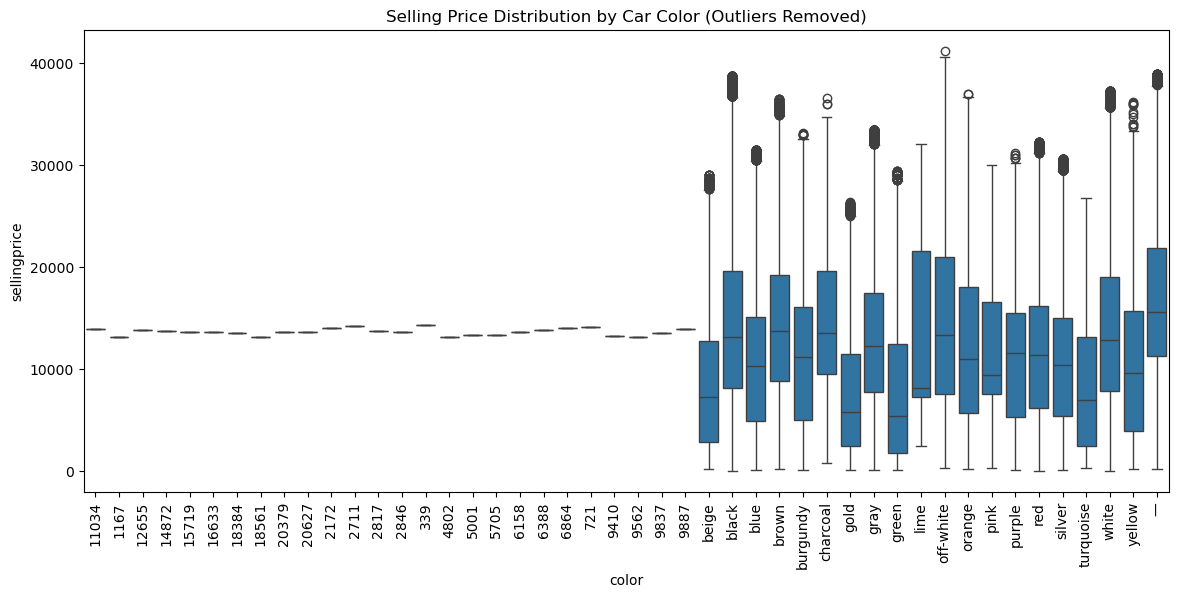

In [36]:
def remove_outliers_IQR(df, column, groupby_col):
    def filter_group(g):
        Q1 = g[column].quantile(0.25)
        Q3 = g[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return g[(g[column] >= lower) & (g[column] <= upper)]
    
    return df.groupby(groupby_col, group_keys=False).apply(filter_group)

# Example usage:
df_no_outliers = remove_outliers_IQR(df, 'sellingprice', 'color')

# Plot the cleaned data


plt.figure(figsize=(14,6))
sns.boxplot(x='color', y='sellingprice', data=df_no_outliers)
plt.xticks(rotation=90)
plt.title("Selling Price Distribution by Car Color (Outliers Removed)")
plt.show()

## Summary of the Selling Price Distribution by Car Color

The chart shows boxplots of selling prices for each car color, including medians, quartiles, and outliers.

Across nearly all colors, the selling price distributions overlap heavily, suggesting that car color has little to no strong impact on typical selling price.

## Key Observations:

Median prices for most colors fall within a similar range (roughly $10,000–$20,000).

All colors have a large number of high-price outliers, some exceeding $150,000–$200,000.

These outliers likely represent luxury or specialty vehicles rather than typical market behavior.

No color clearly dominates with consistently higher median prices.

Some colors (e.g., black, white, silver, grey) show more data points, which is expected because they are common car colors.

Rare colors (e.g., purple, turquoise, gold) have fewer data points, resulting in wider distribution spreads but still similar medians.

## Key Insight:

Car color does not significantly influence selling price.
The large overlap in distributions indicates that differences in value are driven more by factors such as condition, model, mileage, and brand, not color.